# Correlation Analysis A

To examine the relationship between the model parameters


## Requirements


In [1]:
suppressWarnings(suppressPackageStartupMessages({
    library(tidyverse)
    library(ggpubr)
    library(rstatix)
    library(dplyr)
    library(lme4)
    library(AICcmodavg)
    library(MuMIn)
    library(emmeans)
    library(patchwork)
}))

options(warn = -1) # turn-off warnings

## Data preparation

In [1]:
library(readxl)
setwd("C:/DataForR")
getwd()
data = read_excel("ProcessedData.xlsx", sheet = "ModelParams")
data

[1] "C:/DataForR"

subject No.,Axis Orientation,orientation No.,gamma: preference parameter,g: mutual inhibition parameter,average hysteresis [SN],scaled alpha1 (descending),scaled alpha2 (ascending)
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Orthogonal,0,1.5960115,1.0204008,0.5000,0.5937500,0.6354167
1,Oblique,1,0.8823529,1.0000000,0.0000,0.4687500,0.4687500
2,Orthogonal,0,3.0023179,1.0281911,0.2500,0.7395833,0.7604167
2,Oblique,1,0.7614447,1.0028783,-0.1250,0.4375000,0.4270833
3,Orthogonal,0,1.4000000,1.0000000,0.0000,0.5833333,0.5833333
3,Oblique,1,1.2343952,1.0178347,1.0000,0.5104167,0.5937500
4,Orthogonal,0,3.7416574,1.2864959,2.5000,0.6666667,0.8750000
4,Oblique,1,1.4969356,1.0306770,0.8750,0.5625000,0.6354167
5,Orthogonal,0,1.5829979,1.1370830,3.2500,0.4687500,0.7395833


In [3]:
# create a dataframe based on the required columns of data:
subject = data[,"subject No."]
AxisOrientation = data[,"Axis Orientation"]
orientation = data[,"orientation No."]
Gamma = data[,"gamma: preference parameter"]
G = data[,"g: mutual inhibition parameter"]
Hys = data[,"average hysteresis [SN]"]

mydata = data.frame(subject,AxisOrientation,orientation,Gamma,G,Hys)
colnames(mydata) = c("subject","AxisOrientation","orientation","Gamma","G","Hys")

# Convert into factor variables
mydata = mydata %>%
  convert_as_factor(subject,AxisOrientation)

# set the levels:
mydata$AxisOrientation = factor(mydata$AxisOrientation, levels = c("Orthogonal", "Oblique"))

mydata

subject,AxisOrientation,orientation,Gamma,G,Hys
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,Orthogonal,0,1.5960115,1.0204008,0.5000
1,Oblique,1,0.8823529,1.0000000,0.0000
2,Orthogonal,0,3.0023179,1.0281911,0.2500
2,Oblique,1,0.7614447,1.0028783,-0.1250
3,Orthogonal,0,1.4000000,1.0000000,0.0000
3,Oblique,1,1.2343952,1.0178347,1.0000
4,Orthogonal,0,3.7416574,1.2864959,2.5000
4,Oblique,1,1.4969356,1.0306770,0.8750
5,Orthogonal,0,1.5829979,1.1370830,3.2500


In [4]:
# split data based on axix orientation:
mydata1 = mydata[mydata$orientation==0,]
mydata2 = mydata[mydata$orientation==1,]

## Hysteresis & Gamma

In [5]:
res = cor.test(mydata$Hys, mydata$Gamma, method="pearson")

text0 = paste0("r = ", round(res$estimate,3), ",   CI = [", round(res$conf.int[1],3), ", ", round(res$conf.int[2],3), "]")
text0

[1] "r = 0.055,   CI = [-0.186, 0.289]"

`geom_smooth()` using formula = 'y ~ x'


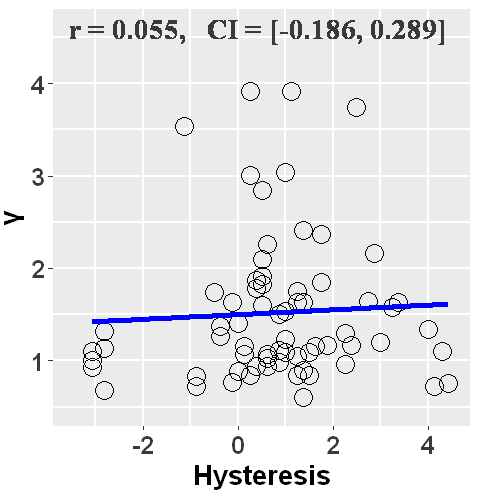

In [6]:
# scatter plot with the regression line:
options(repr.plot.height=4.1, repr.plot.width=4)

p1 = ggplot(mydata, aes(x=Hys, y=Gamma)) + 
    geom_point(size=5, shape = 1) +
    geom_smooth(method=lm, se=FALSE, fill="violet", color="blue", size=1.5) +
    labs(y="\u03b3", x="Hysteresis") + 
    coord_cartesian(ylim = c(0.5, 4.6), xlim = c(-3.5, 4.5)) + 
#     scale_y_continuous(breaks=c(0, 0.25, 0.50, 0.75, 1.00)) + 
    theme(axis.title.x = element_text(size = 16, face="bold"),
          axis.title.y = element_text(size = 16, face="bold", vjust=-3),
          axis.text.x  = element_text(size = 15, face="bold", color="#3a3a3a"),
          axis.text.y  = element_text(size = 15, face="bold", color="#3a3a3a"),
          legend.title = element_text(size = 16, face="bold", color="#3a3a3a"),
          legend.text  = element_text(size = 16, face="bold", color="#3a3a3a"),
          panel.grid.minor = element_line(colour = "white",size=0.8),
          panel.grid.major = element_line(colour = "white",size=0.8)) +
    geom_text(x=-3.55, y=4.6, label=text0, fontface="bold", hjust = 0, size=6.2, color = "#3a3a3a", family = "serif") # ("sans", "serif", "mono")

p1

## Hysteresis & G

In [7]:
res = cor.test(mydata$Hys, mydata$G, method="pearson")

text0 = paste0("r = ", round(res$estimate,3), ",   CI = [", round(res$conf.int[1],3), ", ", round(res$conf.int[2],3), "]")
text0

[1] "r = 0.288,   CI = [0.054, 0.493]"

`geom_smooth()` using formula = 'y ~ x'


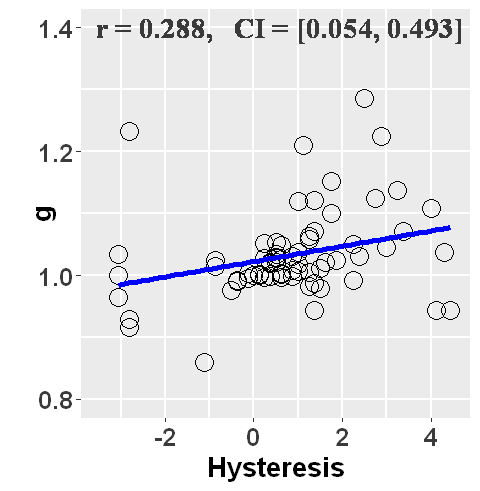

In [8]:
# scatter plot with the regression line:
options(repr.plot.height=4.1, repr.plot.width=4)

p2 = ggplot(mydata, aes(x=Hys, y=G)) + 
    geom_point(size=5, shape = 1) +
    geom_smooth(method=lm, se=FALSE, fill="violet", color="blue", size=1.5) +
    labs(y="g", x="Hysteresis") + 
    coord_cartesian(ylim = c(0.8, 1.4), xlim = c(-3.5, 4.5)) + 
#     scale_y_continuous(breaks=c(0, 0.25, 0.50, 0.75, 1.00)) + 
    theme(axis.title.x = element_text(size = 16, face="bold"),
          axis.title.y = element_text(size = 16, face="bold", vjust=-3),
          axis.text.x  = element_text(size = 15, face="bold", color="#3a3a3a"),
          axis.text.y  = element_text(size = 15, face="bold", color="#3a3a3a"),
          legend.title = element_text(size = 16, face="bold", color="#3a3a3a"),
          legend.text  = element_text(size = 16, face="bold", color="#3a3a3a"),
          panel.grid.minor = element_line(colour = "white",size=0.8),
          panel.grid.major = element_line(colour = "white",size=0.8)) + 
    geom_text(x=-3.55, y=1.4, label=text0, fontface="bold", hjust = 0, size=6.2, color = "#3a3a3a", family = "serif") # ("sans", "serif", "mono")

p2

## Gamma & G

In [9]:
res = cor.test(mydata$Gamma, mydata$G, method="pearson")

text0 = paste0("r = ", round(res$estimate,3), ",   CI = [", round(res$conf.int[1],3), ", ", round(res$conf.int[2],3), "]")
text0

[1] "r = 0.447,   CI = [0.233, 0.619]"

`geom_smooth()` using formula = 'y ~ x'


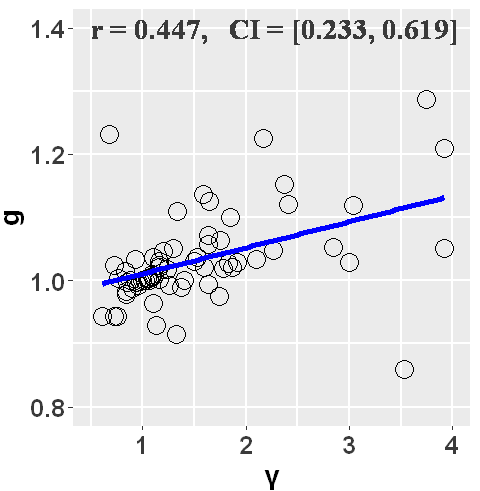

In [10]:
# scatter plot with the regression line:
options(repr.plot.height=4.1, repr.plot.width=4)

p3 = ggplot(mydata, aes(x=Gamma, y=G)) + 
    geom_point(size=5, shape = 1) +
    geom_smooth(method=lm, se=FALSE, fill="violet", color="blue", size=1.5) +
    labs(y="g", x="\u03b3") + 
    coord_cartesian(ylim = c(0.8, 1.4), xlim = c(0.5, 4)) + 
#     scale_y_continuous(breaks=c(0, 0.25, 0.50, 0.75, 1.00)) + 
    theme(axis.title.x = element_text(size = 16, face="bold"),
          axis.title.y = element_text(size = 16, face="bold", vjust=-3),
          axis.text.x  = element_text(size = 15, face="bold", color="#3a3a3a"),
          axis.text.y  = element_text(size = 15, face="bold", color="#3a3a3a"),
          legend.title = element_text(size = 16, face="bold", color="#3a3a3a"),
          legend.text  = element_text(size = 16, face="bold", color="#3a3a3a"),
          panel.grid.minor = element_line(colour = "white",size=0.8),
          panel.grid.major = element_line(colour = "white",size=0.8)) + 
    geom_text(x=0.5, y=1.4, label=text0, fontface="bold", hjust = 0, size=6.2, color = "#3a3a3a", family = "serif") # ("sans", "serif", "mono")

p3

### integrated plots

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


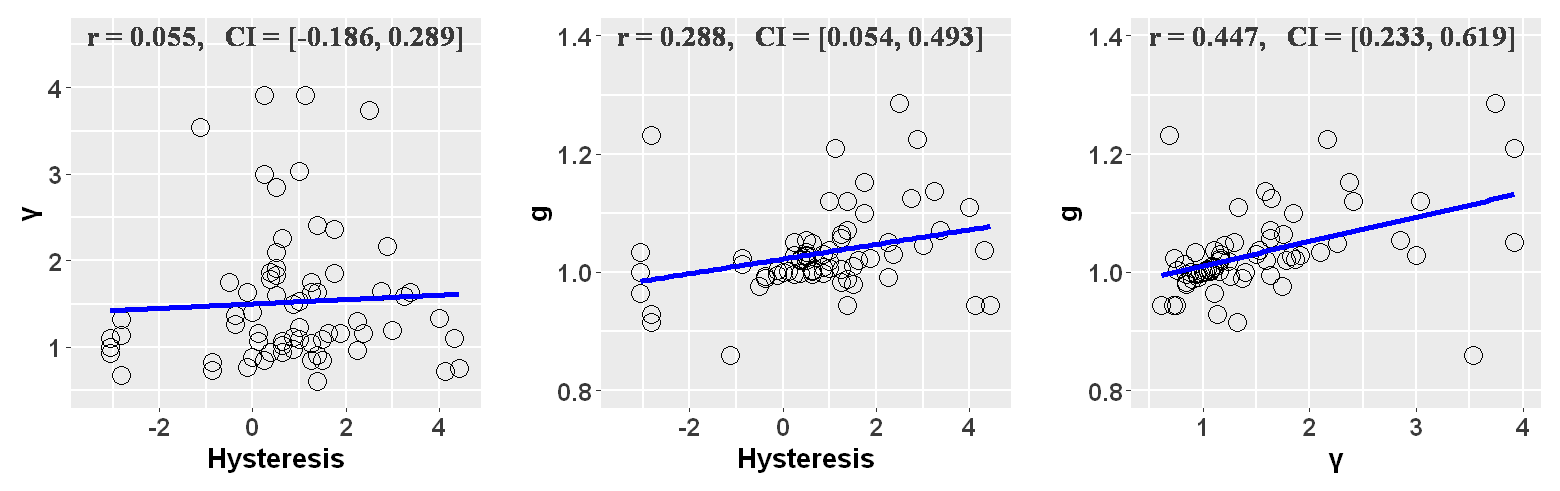

In [13]:
options(repr.plot.height=4.1, repr.plot.width=13)

p1 + theme(axis.title.y = element_text(vjust = 1.5)) + 
    plot_spacer() + 
    p2 + theme(axis.title.y = element_text(vjust = 1.5)) + 
    plot_spacer() + 
    p3 + theme(axis.title.y = element_text(vjust = 1.5)) + 
    plot_layout(nrow = 1, widths = c(4,0.1,4,0.1,4)) 

# save plot:
ggsave("plot_Correlation_A.jpg", dpi = 300, height = 4.1, width = 13)
